<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br><br><br><br><br>
<h1>Classification Model Development</h1>
<em>Apprentice Chef Course Case</em><br><br>

Submitted by Mayank Taggar <br>
Hult International Business School <br><br><br><br>
<br><br><br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

<h2> Data Overview</h2>
This step includes understanding the data using, for that I used <br>
&emsp;1 .shape() to know the number of features and observations <br>
&emsp;2 .head() to know the feature head and also see the data <br>
&emsp;3 .info() provides us information about the data types and missing values <br>
<br>


In [1]:
# importing libraries
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

# loading data
chef_data = pd.read_excel('./dataset/Apprentice_Chef_Dataset_LR.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
chef_data.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,email_domain,domain_group_company,domain_group_junk,domain_group_personal,gender_guess_female,gender_guess_male,gender_guess_unknown
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,unitedhealth.com,1,0,0,0,0,1
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,ge.org,1,0,0,0,0,1
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,jnj.com,1,0,0,0,0,1
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,ge.org,1,0,0,0,0,1
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,jnj.com,1,0,0,0,0,1


In [2]:
#Shape to know the size of our data set
chef_data.shape

print(f"""
Size of Original Dataset
------------------------
Observations: {chef_data.shape[0]}
Features:     {chef_data.shape[1]}
""")



Size of Original Dataset
------------------------
Observations: 1946
Features:     35



In [3]:
#Checking the info
chef_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

In [4]:
#Changing the miss labled feature "Largest order".
chef_data = chef_data.rename(columns={'LARGEST_ORDER_SIZE': 'average_meals_ordered', })

<h2> Data Exploration</h2><br>
&emsp;1. Creating new features based on the first analysis of decision tree estimator and logistic regression <br>
&emsp;2. Calculating the correlation between Cross sell success and other features <br>
&emsp;3. Data division into explanatory and target data. Removing variables that are not needed, are less important to the Y variable.

<br>


In [5]:
#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [6]:
chef_data['junk_revenue'] = chef_data.domain_group_junk  * chef_data.REVENUE # Total revenue given by the junk domain customers
chef_data['total_meals_cancel_junk'] = (chef_data.CANCELLATIONS_BEFORE_NOON + chef_data.CANCELLATIONS_AFTER_NOON) * chef_data.domain_group_junk # getting the total cancelled prders per junk customers
chef_data['reveue_per_order'] = chef_data.REVENUE / chef_data.TOTAL_MEALS_ORDERED
chef_data['video_time_revenue_per_sec'] = chef_data.REVENUE / chef_data.AVG_PREP_VID_TIME
chef_data['mobile_Taste'] = chef_data.MOBILE_NUMBER * chef_data.TASTES_AND_PREFERENCES
chef_data['total_logins_over_total_meals_ordered'] = (chef_data.MOBILE_LOGINS + chef_data.PC_LOGINS) / chef_data.TOTAL_MEALS_ORDERED
chef_data['Freq_Unique'] = chef_data.TOTAL_MEALS_ORDERED/chef_data.UNIQUE_MEALS_PURCH.round(2)
chef_data['contact_order'] = chef_data.CONTACTS_W_CUSTOMER_SERVICE/chef_data.TOTAL_MEALS_ORDERED.round(2)

In [7]:
# Creating a new feature to get to know the qulity of customers to cross sell bettwe
chef_data['low_cancellation_customer'] = 0


# replacing values based on a condition
for index, val in chef_data.iterrows():
    if chef_data.loc[index, 'CANCELLATIONS_BEFORE_NOON'] <= 1.5:
        chef_data.loc[index, 'low_cancellation_customer'] = 1


# checking results
chef_data['low_cancellation_customer'].sum()\


1234

In [8]:
#Creating a new variable name with value count
text_split_feature(col = 'NAME',
                   df  = chef_data)


# checking results
chef_data['number_of_names'].value_counts().sort_index()

1     591
2    1201
3      98
4       9
5      35
6      12
Name: number_of_names, dtype: int64

In [9]:
#Creating a new feature to know if the customer is adult or not
chef_data['adult'] = 0


# replacing values based on a condition
for index, val in chef_data.iterrows():
    if chef_data.loc[index, 'reveue_per_order'] > 30:
        chef_data.loc[index, 'adult'] = 1


# checking results
chef_data['adult'].sum()\


1137

In [10]:
# declaring explanatory variables
#Removing the object type features and log features
app_df = chef_data.drop([ 'NAME',
                        'EMAIL',
                        'FIRST_NAME',
                        'FAMILY_NAME',
                        'email_domain',
                        'CROSS_SELL_SUCCESS'
                        ],
                         axis = 1)

# declaring response variable
app_target = chef_data.loc[ : , 'CROSS_SELL_SUCCESS']

In [11]:
#Finding the missing values in each feature
app_df.isnull().sum(axis = 0)

REVENUE                                  0
TOTAL_MEALS_ORDERED                      0
UNIQUE_MEALS_PURCH                       0
CONTACTS_W_CUSTOMER_SERVICE              0
PRODUCT_CATEGORIES_VIEWED                0
AVG_TIME_PER_SITE_VISIT                  0
MOBILE_NUMBER                            0
CANCELLATIONS_BEFORE_NOON                0
CANCELLATIONS_AFTER_NOON                 0
TASTES_AND_PREFERENCES                   0
PC_LOGINS                                0
MOBILE_LOGINS                            0
WEEKLY_PLAN                              0
EARLY_DELIVERIES                         0
LATE_DELIVERIES                          0
PACKAGE_LOCKER                           0
REFRIGERATED_LOCKER                      0
AVG_PREP_VID_TIME                        0
average_meals_ordered                    0
MASTER_CLASSES_ATTENDED                  0
MEDIAN_MEAL_RATING                       0
AVG_CLICKS_PER_VISIT                     0
TOTAL_PHOTOS_VIEWED                      0
domain_grou

<h2> Data Preparation</h2><br>
&emsp;1. Diving the data into training and testing data sets<br>
&emsp;2. Run a logistic regression to see the significant variables and using them<br>
&emsp;3. Creating a dictionary to store different sets of features that are significant and full data<br>
<br>


In [12]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            app_df,
            app_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = app_target)


# merging training data for statsmodels
app_train = pd.concat([x_train, y_train], axis = 1)

In [13]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



In [14]:
for val in app_df:
    print(f" {val} + ")

 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 average_meals_ordered + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 domain_group_company + 
 domain_group_junk + 
 domain_group_personal + 
 gender_guess_female + 
 gender_guess_male + 
 gender_guess_unknown + 
 junk_revenue + 
 total_meals_cancel_junk + 
 reveue_per_order + 
 video_time_revenue_per_sec + 
 mobile_Taste + 
 total_logins_over_total_meals_ordered + 
 Freq_Unique + 
 contact_order + 
 low_cancellation_customer + 
 number_of_names + 
 adult + 


In [15]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~     
                                     REVENUE + 
                                     TOTAL_MEALS_ORDERED + 
                                     UNIQUE_MEALS_PURCH + 
                                     CONTACTS_W_CUSTOMER_SERVICE + 
                                     PRODUCT_CATEGORIES_VIEWED + 
                                     AVG_TIME_PER_SITE_VISIT + 
                                     MOBILE_NUMBER + 
                                     CANCELLATIONS_BEFORE_NOON + 
                                     CANCELLATIONS_AFTER_NOON + 
                                     TASTES_AND_PREFERENCES + 
                                     PC_LOGINS + 
                                     MOBILE_LOGINS + 
                                     WEEKLY_PLAN + 
                                     EARLY_DELIVERIES + 
                                     LATE_DELIVERIES + 
                                     PACKAGE_LOCKER + 
                                     REFRIGERATED_LOCKER + 
                                     AVG_PREP_VID_TIME + 
                                     average_meals_ordered + 
                                     MASTER_CLASSES_ATTENDED + 
                                     MEDIAN_MEAL_RATING + 
                                     AVG_CLICKS_PER_VISIT + 
                                     TOTAL_PHOTOS_VIEWED + 
                                     domain_group_company + 
                                     domain_group_junk + 
                                     domain_group_personal + 
                                     gender_guess_female + 
                                     gender_guess_male + 
                                     gender_guess_unknown + 
                                     junk_revenue + 
                                     total_meals_cancel_junk + 
                                     reveue_per_order + 
                                     video_time_revenue_per_sec + 
                                     mobile_Taste + 
                                     total_logins_over_total_meals_ordered + 
                                     Freq_Unique + 
                                     contact_order + 
                                     low_cancellation_customer + 
                                     number_of_names + 
                                     adult   """,
                                     data    = app_train)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full.summary()

Optimization terminated successfully.
         Current function value: 0.530193
         Iterations 10


C:\Users\mayan\anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1420
Method:                           MLE   Df Model:                           38
Date:                Thu, 28 Jan 2021   Pseudo R-squ.:                  0.1557
Time:                        21:21:19   Log-Likelihood:                -773.55
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.201e-39
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.9538   5.62e+06  -3.48e-07      1.000    -1.1e+07     1.1e+07
REVENUE                                  -0.0002      0.000     -0.713      0.476      -0.001       0.000
TOTAL_MEALS_ORDERED                      -0.0045      0.003     -1.775      0.076      -0.009       0.000
UNIQUE_MEALS_PURCH                       -0.0019      0.039     -0.048      0.962      -0.078       0.074
CONTACTS_W_CUSTOMER_SERVICE               0.1021      0.067      1.527      0.127      -0.029       0.233
PRODUCT_CATEGORIES_VIEWED                -0.0121      0.021     -0.580      0.562      -0.053       0.029
AVG_TIME_PER_SITE_VISIT                6.051e-05      0.001      0.059      0.953      -0.002       0.002
MOBILE_NUMBER                             0.9765      0.334      2.924      0.003       0.322       1.631
CANCELLATIONS_BEFORE_NOON                 0.1118      0.084      1.339      0.181      -0.052       0.276
CANCELLATIONS_AFTER_NOON                 -0.2950      0.149     -1.986      0.047      -0.586      -0.004
TASTES_AND_PREFERENCES                    0.4583      0.364      1.258      0.208      -0.256       1.172
PC_LOGINS                                 0.2418      0.126      1.914      0.056      -0.006       0.489
MOBILE_LOGINS                            -0.2017      0.135     -1.498      0.134      -0.466       0.062
WEEKLY_PLAN                               0.0057      0.005      1.185      0.236      -0.004       0.015
EARLY_DELIVERIES                          0.0616      0.028      2.184      0.029       0.006       0.117
LATE_DELIVERIES                           0.0167      0.023      0.726      0.468      -0.028       0.062
PACKAGE_LOCKER                            0.0752      0.151      0.497      0.619      -0.221       0.372
REFRIGERATED_LOCKER                       0.4352      0.241      1.809      0.070      -0.036       0.907
AVG_PREP_VID_TIME                         0.0050      0.005      1.080      0.280      -0.004       0.014
average_meals_ordered                    -0.0529      0.071     -0.744      0.457      -0.192       0.086
MASTER_CLASSES_ATTENDED                   0.1879      0.118      1.588      0.112      -0.044       0.420
MEDIAN_MEAL_RATING                        0.1017      0.175      0.582      0.561      -0.241       0.444
AVG_CLICKS_PER_VISIT                     -0.0277      0.052     -0.531      0.595      -0.130       0.075
TOTAL_PHOTOS_VIEWED                      -0.0002      0.000     -0.528      0.597      -0.001       0.001
domain_group_company                      0.1934   5.25e+06   3.68e-08      1.000   -1.03e+07    1.03e+07
domain_group_junk                        -2.0345   5.25e+06  -3.88e-07      1.000   -1.03e+07    1.03e+07
domain_group_personal                    -0.2547   5.25e+06  -4.85e-08      1.000   -1.03e+07    1.03e+07
gender_guess_female                      -1.4042        nan  

<h2> Data Modeling</h2><br>
&emsp;1. Logistic Regression<br>
&emsp;2. Desicion Tree<br>
&emsp;3. Random Forest<br>
<br>
<br

In [16]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {
    
 # significant variables only (set 1)
 'logit_full'    : ['REVENUE','TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
                    'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
                    'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
                    'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES' ,'PC_LOGINS' ,
                    'MOBILE_LOGINS','WEEKLY_PLAN' , 'EARLY_DELIVERIES' ,'LATE_DELIVERIES', 'PACKAGE_LOCKER' ,
                    'REFRIGERATED_LOCKER','AVG_PREP_VID_TIME' ,'average_meals_ordered',
                    'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT',
                    'TOTAL_PHOTOS_VIEWED','domain_group_company','domain_group_junk'  ,
                    'gender_guess_female', 'gender_guess_male', 'low_cancellation_customer',
                    'number_of_names' ,'adult' ],

    
}
    
  

In [17]:
# new packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer 

<h3> Logistic Regression </h3><br>
Using the full data on Logistic Regression model and improve the model using hyper parameter to tune the parameters and increase the AUC Score. Also helps in understanding if the data is over fitting or under fitting in the model<br> 
<br>
<br>

In [18]:
# train/test split
app_df   =  chef_data.loc[ : , candidate_dict['logit_full']]
app_target =  chef_data.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            app_df,
            app_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = app_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(X_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(X_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

C:\Users\mayan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogReg Training ACCURACY: 0.7169
LogReg Testing  ACCURACY: 0.7002
LogReg Train-Test Gap   : 0.0167


In [19]:
# creating a confusion matrix
confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred)


# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 31
False Positives: 125
False Negatives: 21
True Positives : 310



In [20]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.5676


In [21]:
########################################
# RandomizedSearchCV
########################################


#declaring a hyperparameter space
#C_space          = pd.np.arange(0.1, 5.0, 0.1)
#warm_start_space = [True, False]
#solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
#param_grid = {'C'          : C_space,
 #            'warm_start' : warm_start_space,
  #           'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
#lr_tuned = LogisticRegression(random_state = 219,
 #                            max_iter     = 1000)


# GridSearchCV object
#lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
 #                                param_distributions = param_grid, # parameters to tune
  #                               cv                  = 3,          # how many folds in cross-validation
   #                              n_iter              = 300,        # number of combinations of hyperparameters to try
    #                             random_state        = 219,        # starting point for random sequence
     #                            scoring = make_scorer(
      #                                     roc_auc_score,
       #                                    needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
#lr_tuned_cv.fit(app_df, app_target)

#printing the optimal parameters and best score
#print("Tuned Parameters  :", lr_tuned_cv.best_params_)
#print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

In [22]:

# INSTANTIATING a logistic regression model with tuned values
#lr_tuned_cv.best_estimator_

In [23]:
lr_tuned = LogisticRegression(C=0.5, max_iter=1000, random_state=219, solver='newton-cg',
                   warm_start=True)


lr_tuned_fit = lr_tuned.fit(app_df, app_target)

# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(X_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(X_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(X_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(X_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(X_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc



LR Tuned Training ACCURACY: 0.7505
LR Tuned Testing  ACCURACY: 0.7515
LR Tuned AUC Score        : 0.6596


In [24]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 63
False Positives: 93
False Negatives: 28
True Positives : 303



<h3> CART Model </h3><br>
Using the full data on desicion tree, analysing the important features and then improving the model using hyperparameter to tune the parameter.
To eventually increse the AUC Score<br> 
Insights: The junk mail customers that are not focused on but on the other hand result in the highest True positive values for
for cross sell.
<br

In [25]:
########################################
#CART Model

########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [26]:
# INSTANTIATING a classification tree using the fll data
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(X_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(X_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(X_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(X_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 1.0
Full Tree Testing ACCURACY : 0.6674
Full Tree AUC Score: 0.6197


In [27]:
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 76
False Positives: 80
False Negatives: 82
True Positives : 249



C:\Users\mayan\anaconda3\lib\site-packages\ipykernel_launcher.py:66: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


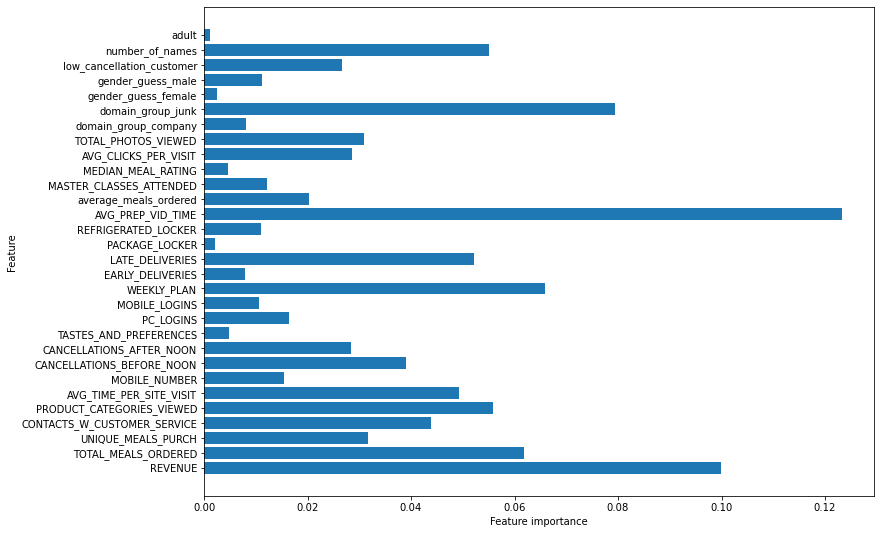

In [28]:
# plotting feature importance
plot_feature_importances(full_tree_fit,
                         train = X_train,
                         export = False)

In [29]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
#criterion_space = ['gini', 'entropy']
#splitter_space  = ['best', 'random']
#depth_space     = pd.np.arange(1, 25, 1)
#leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
#param_grid = {'criterion'        : criterion_space,
 #             'splitter'         : splitter_space,
  #            'max_depth'        : depth_space,
   #           'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
#tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
#tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
 #                                  param_distributions   = param_grid,
  #                                 cv                    = 3,
   #                                n_iter                = 1000,
    #                               random_state          = 219,
     #                              scoring = make_scorer(roc_auc_score,
      #                                       needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_tree_cv.fit(app_df, app_target)


# printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_tree_cv.best_params_)
#print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

In [30]:
#tuned_tree_cv.best_estimator_

In [31]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(max_depth=3, min_samples_leaf=16, random_state=219)

# FIT step is not needed
tree_tuned_fit = tree_tuned.fit(app_df, app_target)

# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(X_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(X_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7402
Testing  ACCURACY: 0.7762
AUC Score        : 0.732


In [32]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 95
False Positives: 61
False Negatives: 48
True Positives : 283



<h3> Random Forest </h3><br>
Using the full data on Random Forest to know the best decision tree using hyper parameter tunning. Then analyzing the important features and then improving the model using hyperparameter to tune the parameter.
To eventually increase the AUC value<br>
<br>
There are variable like numer of names, Junk email domain, Average time spent on watching prepation videos
<br

In [33]:
# new packages
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
######Random Forest######

# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [35]:
# FITTING the training data
rf_default_fit = rf_default.fit(X_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(X_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

#Saving the data
rf_default_train_score = rf_default_fit.score(X_train, y_train).round(4)
rf_default_test_score = rf_default_fit.score(X_test, y_test).round(4)
rf_default_auc_score = roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4)

Training ACCURACY: 1.0
Testing  ACCURACY: 0.7413
AUC Score        : 0.6351


C:\Users\mayan\anaconda3\lib\site-packages\ipykernel_launcher.py:66: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


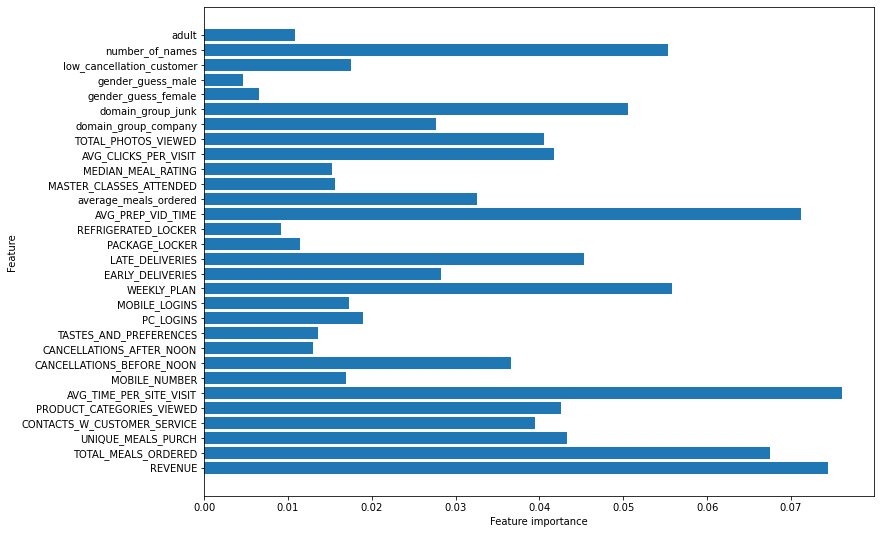

In [36]:
plot_feature_importances(rf_default_fit,
                         train = X_train,
                         export = False)

In [37]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 53
False Positives: 103
False Negatives: 23
True Positives : 308



In [38]:
# FITTING the training data
#rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
#rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
#estimator_space  = pd.np.arange(600, 1100, 250)
#leaf_space       = pd.np.arange(1, 30, 1)
#depth_space      = pd.np.arange(1, 8, 1)
#criterion_space  = ['gini', 'entropy']
#bootstrap_space  = [True, False]
#warm_start_space = [True, False]


# creating a hyperparameter grid
#param_grid = {'n_estimators'     : estimator_space,
 #             'min_samples_leaf' : leaf_space,
  #            'max_depth'        : depth_space,
   #           'criterion'        : criterion_space,
    #          'bootstrap'        : bootstrap_space,
     #         'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
#forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
#forest_cv = RandomizedSearchCV(estimator           = forest_grid,
 #                              param_distributions = param_grid,
  #                             cv         = 3,
   #                            n_iter     = 1000,
    #                           scoring    = make_scorer(roc_auc_score,
     #                                       needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#forest_cv.fit(app_df, app_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", forest_cv.best_params_)
#rint("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [39]:
#forest_cv.best_estimator_

In [40]:

# building a model based on hyperparameter tuning results

# copy/pasting in the best_estimator_ results
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=7,
                       min_samples_leaf=3, n_estimators=850, random_state=219,
                       warm_start=True)

# FITTING the model object
forest_tuned_fit = forest_tuned.fit(app_df, app_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(X_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(X_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(X_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                   y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(X_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(X_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8245
Forest Tuned Testing  ACCURACY: 0.8275
Forest Tuned AUC Score        : 0.7426


In [41]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 79
False Positives: 77
False Negatives: 7
True Positives : 324



<h2> Classification Models Performance </h2><br>
The highest performance id of the Random Forest Pruned Model with a AUC score of 0.7426 and a True Positive of 324 being the highest among other models. 
<br>
This AOC score can further be improved by running different sets of hyper parameter tunning to get the best set of parameter for that model. Also the features can be improved by keeping only the important features. 
<br

In [42]:
# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Tuned Tree', 'Random Forest full', 'Random Forest pruned'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, tree_tuned_auc, rf_default_auc_score, forest_tuned_auc],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           tree_tuned_train_score, rf_default_train_score,
                           forest_tuned_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           tree_tuned_test_score, rf_default_test_score,
                           forest_tuned_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp),
                           (rf_tn, rf_fp, rf_fn, rf_tp),
                          (tuned_rf_tn, tuned_rf_fp, tuned_rf_fn, tuned_rf_tp)
                          ]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./dataset/classification_model_performance.xlsx',
                           index = False)

In [43]:
model_performance.head()

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.5676,0.7169,0.7002,"(31, 125, 21, 310)"
1,Full Tree,0.6197,1.0000,0.6674,"(76, 80, 82, 249)"
2,Tuned Tree,0.7320,0.7402,0.7762,"(95, 61, 48, 283)"
3,Random Forest full,0.6351,1.0000,0.7413,"(53, 103, 23, 308)"
4,Random Forest pruned,0.7426,0.8245,0.8275,"(79, 77, 7, 324)"
